## ----------------------- Satisfication Index of Employee for Work Evaluation -----------------------

# Definition, Problems, Goals, Limitasi Model

------------------------------------------------------------------------------------------------------------------------------------------------------

### Definition

This Machine Learning is a model for determining the employee satisfaction index at work that can be used by companies to evaluate employee performance. So, it can be used further as a tool to select employees for promotion or attrition.

### Problems & Goals

2.1 Problems
- August 2020, Covid cases in Indonesia are still increasing (national.kompas.com). One of the effects of this covid is the reduction in the number of employees working in a company. Lots of companies lay off employees to stabilize their finances. However, when carrying out layoffs, it will be very disadvantage to the company if they fire quality employees. Therefore, this machine model will be very helpful to be used as an employee evaluation while working in a company

- According to Maier (2000: 116), the factors that affect termination of employment are:
  1. Age
  2. Length of Work
  3. Satisfaction
  4. Company Culture
  Based on the factors mentioned above, it is very important to know the Employee Job Satisfaction Index

2.2 Goals
- Knowing what variables can affect the employee job satisfaction index.
- Creating a model that can determine the employee job satisfaction index at work that can be used as a job evaluation material.

2.3 Limitation
- This model is only a tool to determine the employee satisfaction index in percentage levels, but it can be developed further to detect employee churn / no churn.
- This model can be used for various companies as a consideration in terminating or promoting employee positions.

# Import Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999

%matplotlib inline

# Import Data

------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
df = pd.read_csv('satisfaction.csv', index_col=0)
df1 = df.copy()

In [3]:
df1.head()

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1


------------------------------------------------------------------------------------------------------------------------------------------------------

# EDA

### Salary Analysis

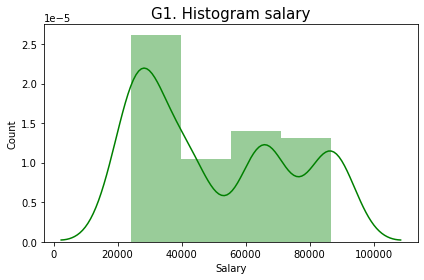

In [4]:
plt.figure(figsize=(6,4))
sns.distplot(df1.salary, bins=4, color='g')
plt.title('G1. Histogram salary', fontsize=15)
plt.ylabel('Count', fontsize=10)
plt.xlabel('Salary', fontsize=10)  
plt.tick_params(labelsize=10)
plt.tight_layout()
# plt.savefig('G1.png')
plt.show()

- Based on G1 above, the distribution plot is positive skewness. Most of the employee's salary is in range 20000 - 40000 (currency unit)

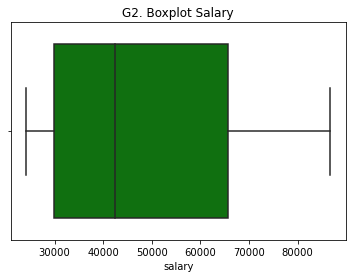

In [5]:
plt.figure(figsize=(6,4))
sns.boxplot(df1.salary, color='g')
plt.title('G2. Boxplot Salary')
# plt.savefig('G2.png')
plt.show()

- The G2 said same result with G1, that salary distribution data is skewed in low value. This boxplot is asymmetric

In [6]:
df1.salary[df1.satisfied==1].median()

42419.0

In [7]:
round((pd.crosstab(index=df1.satisfied, columns='Gaji', values=df1.salary, aggfunc='mean')),2)

col_0,Gaji
satisfied,
0,49838.92
1,50936.13


- The Average Salary of Employee when **satisfied is 50936.13 Currency Unit**
- And, the average Salary of Employee when **not satisfied is 49848,92 Currency Unit**

So, if there is employee with salary **above 50936,13** not satisfied, that isn't normal.

In [8]:
tab1 = df1[(df1.satisfied==0) & (df1.salary>=50936.13)]
tab1

,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
6,PUR1466,26,Purchasing,Suburb,UG,Referral,5,5,0,2,0,86750,0
24,SAL3047,31,Sales,Suburb,PG,Walk-in,4,4,0,3,1,65715,0
25,SAL3747,53,Sales,Suburb,PG,Recruitment Agency,4,5,0,8,1,65715,0
27,PUR3734,30,Purchasing,City,UG,On-Campus,4,3,0,4,1,65715,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,HR6588,31,HR,City,UG,Walk-in,4,4,1,3,0,65715,0
483,PUR4636,27,Purchasing,City,PG,Walk-in,4,3,0,1,0,65715,0
485,PUR2062,47,Purchasing,City,UG,Recruitment Agency,5,3,0,5,1,86750,0
490,PUR7541,47,Purchasing,Suburb,UG,Recruitment Agency,4,4,0,6,1,65715,0


**What's going on?**
- There are 98 employee with salary more than 50936,13 not satisfied

**Lets see the correlation with Job Level**

### Job_level Analysis

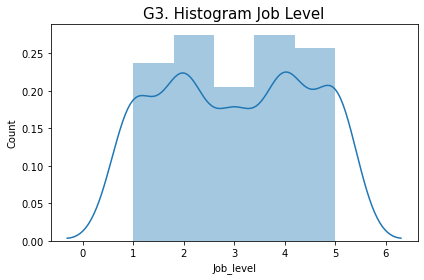

In [9]:
sns.distplot(df1.job_level, bins=5)
plt.title('G3. Histogram Job Level', fontsize=15)
plt.ylabel('Count', fontsize=10)
plt.xlabel('Job_level', fontsize=10)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
# plt.savefig('G3.png')
plt.show()

- Most of job_level distributions is on level 2 and 4. The job_level is normally distributed

In [10]:
pd.crosstab(index=df1.satisfied, columns=df1.job_level, values=df1.satisfied, aggfunc='count', margins=True)

job_level,1,2,3,4,5,All
satisfied,,,,,,
0,41,57,41,53,45,237
1,54,53,41,57,58,263
All,95,110,82,110,103,500


- There was an increase in the number of dissatisfied employees from **job_level 3** to **job_level 4**, this shows that **an increasing number of employees are very dissatisfied at work even though they already have a fairly high job_level**

- Let see weather the number of employees dissatisfied are same or not with tab1 (the table that I slice for employees dissatisfied with salary above 50936,13 Currency unit) 

In [11]:
pd.crosstab(index='Num_employee_not_satisfied', columns=tab1.job_level, values=tab1.job_level, aggfunc='count')

job_level,4,5
row_0,,
Num_employee_not_satisfied,53,45


In [12]:
df1.salary[(df1.job_level>=4) & (df1.satisfied==0)].min()

65715

- The number of employees dissatisfied are same. So we can say that 98 employees dissatisfied when job_level are high (4 & 5) because there are mismatch between salary and job_level.
- There were normal when employee's job_level is low, the employee isn't satisfied. But there were **abnormal** when employee has high job_level, they are **not satisfied**

### Rating Analysis

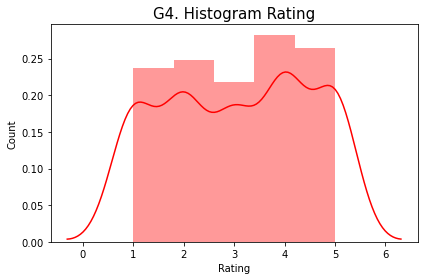

In [13]:
sns.distplot(df1.rating, bins=5, color='r')
plt.title('G4. Histogram Rating', fontsize=15)
plt.ylabel('Count', fontsize=10)
plt.xlabel('Rating', fontsize=10)  
plt.tick_params(labelsize=10) # ukuran xticks & yticks
plt.tight_layout()
# plt.savefig('G4.png')
plt.show()

- Rating is normally distributed and spread well

In [14]:
pd.crosstab(index=df1.satisfied, columns=df1.rating, values=df1.satisfied, aggfunc='count')

rating,1,2,3,4,5
satisfied,,,,,
0,51,48,46,50,42
1,44,51,41,63,64


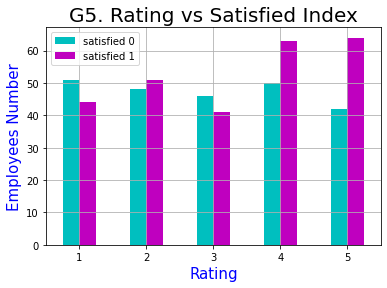

In [15]:
pd.crosstab(index=df1.rating, columns=df1.satisfied, values=df1.satisfied, aggfunc='count').plot(
    figsize=(6,4), 
    kind='bar',
    color = 'cm')
plt.grid(True)
plt.title('G5. Rating vs Satisfied Index', fontsize=20)
plt.xlabel('Rating', color ='b', fontsize=15)
plt.ylabel('Employees Number', color='b', fontsize=15)
plt.tick_params(labelsize=10)
plt.legend(['satisfied 0','satisfied 1'])
plt.xticks(rotation=360)
# plt.savefig('G5.png')
plt.show()

- Same as Job_level, there was **anomaly on rating 4**, the normally corelation should be **The greater rating, the fewer number of dissatisfied employees**, but in this case, it happened the opposite. Maybe we can connect this anomaly with the job_levels anomaly. Because of employee performance at high job level is not appropriate, causing a decrease in rating. This may result in the company's poor evaluation of its employees. Therefore, at job_level 4 there is an increase in dissatisfied employees

In [16]:
rating = df1[(df1.job_level>=4) & (df1.satisfied==0) & (df1.rating>=3)]
pd.crosstab(index=rating.satisfied, columns=rating.rating, values=rating.satisfied, aggfunc='count')

rating,3,4,5
satisfied,,,
0,18,24,21


- It turned out that there was an increase of 6 dissatisfied people, when job_level> = 4 and rating> = 4 when compared to the previous rating

### Certifications Analysis

In [17]:
round((pd.crosstab(index=df1.satisfied, columns=df1.certifications, values=df1.certifications, aggfunc='count', normalize='index', margins=True)*100),2)

certifications,0,1
satisfied,,
0,49.79,50.21
1,50.95,49.05
All,50.40,49.60


- Based on the table above, there are approximately **50.21%** employees who are certified but **dissatisfied** in their work. Where should those who have been certified be satisfied at work if they get the appropriate facilities. So this means those who have been certified get facilities that are below standard

### Education Analysis

In [18]:
df1.education.unique()

array(['PG', 'UG'], dtype=object)

- Post Graduate ==> Are employees who have completed higher education or equivalent to a Bachelor's degree or are currently pursuing a Master's Degree
- Under Graduate ==> Are employees who have not completed higher education but have completed high school education (blog.recruitee.com)

#### Hypothesis of Education
- Many employees with "PG" educational background have a satisfaction index of 0 (Not Satisfied)

In [19]:
round((pd.crosstab(index=df1.satisfied, columns=df1.education, values=df1.satisfied, aggfunc='count', normalize='index')*100),2)

education,PG,UG
satisfied,,
0,49.37,50.63
1,52.09,47.91


- In the table above, it is very natural when **satisfied index = 1** is dominated by employees with education **PG** because the job position or facilities obtained should be better. Or when **satisfied index = 0** is dominated by **UG**. However, the anomaly here is **proportional**, where the difference between education **(PG vs PG) / (UG vs UG)** on the satisfaction index is almost same, 1 : 1 for the job satisfaction index. This means that education is not very influential

### Combine Feature Analysis

In [20]:
pd.crosstab(index=df1.satisfied, 
            columns='Number Employee', 
            values=df1.emp_id[(df1.salary>=50936.13) & (df1.job_level>=4) & (df1.rating>=4) & (df1.certifications==1) & (df1.education=='PG') & (df1.satisfied==0)], 
            aggfunc='count')

col_0,Number Employee
satisfied,
0,14
1,0


These 14 Employee are anomaly, where they should be:
  1. When salary >= The average salary of satisfied employees
  2. Job_level >= 4,
  3. Certification == 1 (Certified)
  4. Rating >= 4,
  5. and Education == PG,
  
  
can have a "Satisfied" Satisfaction index when working. But what happened was they were not quite satisfied with these conditions. This means that there are two possibilities that they (employees) want to do:

  a. Change job, or
  
  b. Get a facility/fee upgrade

# EDA Conclusion

- The Average Salary of Employee when satisfied is 50936.13 Currency Unit
- There are 98 employee with salary more than 50936,13 not satisfied
- These 98 employees dissatisfied when job_level are high (4 & 5) because there are mismatch between salary and job_level.
- There are incresing Dissatisfied Employee on rating 4, and most of them are in job_level = 4
- Education and Certification doesn't really affect with Satisfaction Index
- The variables that highly correlated of the job satisfaction index are salary, job_ level, and rating